# Chapter 03. 회귀 알고리즘과 모델 규제

## 03-3. 특성 공학과 규제
- 다중회귀의 특성공학
- 과대적합을 막기 위한 릿지 / 라쏘 회귀

#### Multiple Regression 다중 회귀
- 여러 개의 특성을 사용한 선형 회귀
- 특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현할 수 있다.

#### Feature Engineering 특성공학
- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
- 사이킷런에서는 변환기가 특성을 만들거나 전처리를 담당<br>
  => PolynomialFeature 클래스

#### 데이터 준비
- pandas의 dataframe 구조 이용 <br>
- pandas는 인터넷에서 데이터를 바로 다운로드하여 사용할 수 있음
<br><br>
- dataframe -> numpy array : to_numpy()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://bit.ly/perch_csv_data')

In [3]:
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
import numpy as np

In [5]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#### Train / Test set split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#### 사이킷런의 변환기 transformer
- 사이킷런은 특성을 만들거나 전처리 하기 위한 다양한 클래스 제공 : 변환기 transformer <br>
  => 변환기 중 하나 PolynomialFeatures 
<br><br>
- 객체 생성 => fit() => transform()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly = PolynomialFeatures(include_bias=False)  #객체 생성 #include_bias 옵션 : 사이킷런 선형모델은 자동으로 절편을 추가 
poly.fit(train_input)   #fit()
train_poly = poly.transform(train_input) #transform()
print(train_input.shape) #배열 크기 확인

(42, 3)


In [10]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [11]:
test_poly = poly.transform(test_input)   #항상 훈련세트 기준으로 테스트세트 변환해야한다.

#### 다중 회귀 모델 훈련하기
- 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같음<br>
  다중 회귀 모델은 여러 특성을 활용하여 선형 회귀를 수행하는 것

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(train_poly, train_target)

LinearRegression()

In [15]:
print(lr.score(train_poly, train_target))

0.9903183436982125


In [16]:
print(lr.score(test_poly, test_target))

0.9714559911594155


#### 특성을 더 많이 추가하기 (고차항 차수 지정)

In [17]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [18]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [19]:
print(lr.score(test_poly, test_target))   #과대적합 확인 가능

-144.40744532797535


#### 규제 Regularization
- 머신러닝 모델이 훈련 세트를 과도하게 훈련하는 것을 방지하기 위해 고의적으로 훼방을 놓는 것
- 선형 회귀 모델의 경우, 특성에 곱해지는 계수 또는 기울기의 크기를 작게 만들어 규제함
- 과도한 학습보다, 보편적인 패턴을 찾아내는 것이 더 좋음
<br><br>
- 특성의 scale을 맞춰주어야 공정한 제어가 가능함. 따라서 정규화 과정을 거쳐야 함
- 정규화에는 StandardScaler 사용

#### 규제 모델
- 선형 회귀 모델에 규제를 추가한 모델 : 릿지 / 라쏘 / 엘라스틱 넷
- 1) 릿지 : 계수를 제곱한 값을 기준으로 규제 적용 <br>
  2) 라쏘 : 계수의 절대값을 기준으로 규제 적용, (덜 중요한)계수의 크기를 아예 0으로 만들 수도 있음 <br>
  3) 엘라스틱 넷 : 릿지회귀와 라쏘회귀를 절충한 모델
  <br><br>
- 일반적으로 릿지를 기본으로 하지만, 모델에서 쓰이는 변수가 몇 개 안된다고 판단된다면 라쏘나 엘라스틱 넷이 더 나을 수 있음 <br>
  다중공선성이 의심된다면 엘라스틱 넷이 더 좋을 듯

#### 정규화 StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### 릿지 회귀 Ridge

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [24]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


#### Ridge hyperparameter 조절
- alpha 값에 대한 $R^2$ 값의 그래프 <br>
  => 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값

In [25]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [26]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

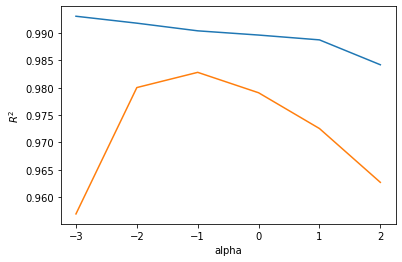

In [27]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.show()

In [28]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


#### 라쏘 회귀 Lasso

In [29]:
from sklearn.linear_model import Lasso

In [30]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [31]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


#### Lasso hyperparameter 조절
- alpha 값에 대한 $R^2$ 값의 그래프 <br>
  => 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값

In [32]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\haeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\haeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\haeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


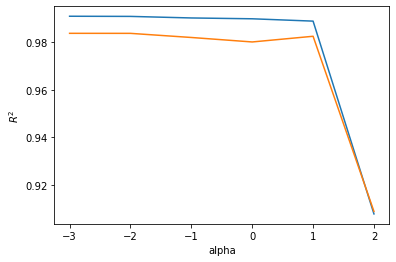

In [33]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.show()

In [34]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [35]:
print(np.sum(lasso.coef_==0))   # 55의 특성 중 라쏘모델에서 쓰인 특성은 15개

40
